### Estadísticos
En este notebook se visualiza información descriptiva sobre el cancer de piel, a continuación se realizan algunas operaciones de rutina para describir la base de datos obtenida de The National and Cancer Registration Analysis Service (NCRAS).

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import os

In [17]:
csv_directory = '../Data/Csv/'
filename = 'GDO_data_thin.csv'

In [18]:
path = csv_directory + filename
df = pd.read_csv(path)
df.head(5)

,cancer_site,year,tumour_type,tumour_type_2,tumour_type_3,basis_of_diagnosis,stage,stage_detail,stage_detail_2,age,region,sex,grade,nodal_status,variable,value
0,"Bladder, Urethra, Renal Pelvis and Ureter",2013,All,All,All,Not split by Basis of Diagnosis,All stages,All,All,All ages,All England,Persons,All grades,Not split by nodal status,incidence,20681
1,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,All,All,Not split by Basis of Diagnosis,All stages,All,All,All ages,All England,Persons,All grades,Not split by nodal status,incidence,2111
2,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,Malignant and in situ,All,Not split by Basis of Diagnosis,All stages,All,All,All ages,All England,Persons,All grades,Not split by nodal status,incidence,1978
3,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,Malignant and in situ,All,Not split by Basis of Diagnosis,Non-muscle-invasive,All,All,All ages,All England,Persons,All grades,Not split by nodal status,incidence,858
4,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,Malignant and in situ,All,Not split by Basis of Diagnosis,Non-muscle-invasive,Ta/Tis,All,All ages,All England,Persons,All grades,Not split by nodal status,incidence,583


In [19]:
df["cancer_site"].value_counts()

Oesophageal and stomach                                    128184
Prostate                                                    95256
Pancreas                                                    83496
Brain, meningeal and other primary CNS tumours              82320
Head and neck                                               79968
Kidney                                                      67032
Sarcoma                                                     54096
Ovary, fallopian tube and primary peritoneal carcinomas     45864
Bladder, Urethra, Renal Pelvis and Ureter                   38808
Testicular tumours including post-pubertal teratomas        18816
Soft tissue and peripheral nerve cancer                      1176
Kaposi Sarcoma                                               1176
Bone cancer                                                  1176
Name: cancer_site, dtype: int64

In [20]:
df["tumour_type_2"].value_counts()

All                                                 424536
Overlapping lesion and unspecified                   37632
Lower third                                          32928
Malignant and in situ                                31752
Renal cell carcinoma NOS                             30576
Non-Cardia                                           21168
Clear cell RCC                                       21168
Upper and middle third                               17640
Cardia and oesophagogastric junction                 15288
Gastrointestinal stromal sarcoma (GIST)               9408
Leiomyosarcoma                                        5880
Undifferentiated Sarcoma                              5880
Chromophobe RCC                                       4704
Other malignant soft tissue tumours                   4704
Papillary RCC                                         4704
Liposarcoma                                           4704
Uncertain or unknown                                  23

In [21]:
df["tumour_type_3"].value_counts()

All                        551544
Adenocarcinoma              71736
Squamous cell carcinoma     28224
Other                       23520
Urothelial                  15288
Stomach                      5880
Small intestine              1176
Name: tumour_type_3, dtype: int64

Se remueven las categorías no relacionadas con el cancer de piel y también el acumulado "All Ages".

In [30]:
df = df[df.age.apply(lambda x: x !="All ages")]
df = df[df.cancer_site.apply(lambda x: x =="Sarcoma")]

In [31]:
df.shape

(21168, 16)

In [32]:
df.dtypes

cancer_site           category
year                  category
tumour_type             object
tumour_type_2           object
tumour_type_3           object
basis_of_diagnosis      object
stage                   object
stage_detail            object
stage_detail_2          object
age                   category
region                category
sex                     object
grade                   object
nodal_status            object
variable                object
value                   object
dtype: object

Es necesario cambiar los tipos de datos a su valor correspondiente.

In [33]:
df['cancer_site'] = df['cancer_site'].astype('category')
df['year'] = df['year'].astype('category') 
df['region'] = df['region'].astype('category') 
df['age'] = df['age'].astype('category') 

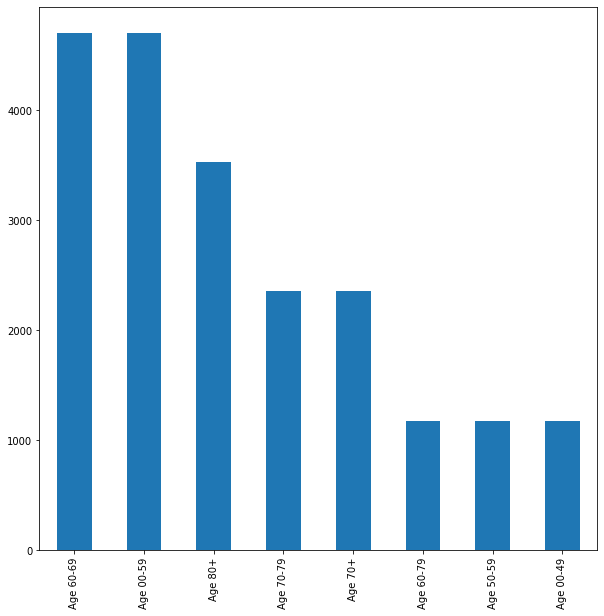

In [34]:
df['age'].value_counts().plot(kind='bar', figsize=(10,10))